In [0]:
pip install mlflow

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━

In [0]:
dbutils.library.restartPython()

In [0]:
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Loading the data
displaying the first 5 rows of the dataset

Dataset link-
https://www.kaggle.com/irisfanfan/store-data?select=Store.csv

sample function will display the random rows from the dataset, bydefault it will display 1, and also number of rows we can pass it as parameter

In [0]:
store_revenue = pd.read_csv('/dbfs/FileStore/tables/store.csv')

store_revenue.sample(10)

,revenue,reach,local_tv,online,instore,person,event
710,44117.41,4,26194.72,2009,3628,15,non_event
52,31544.18,3,30520.15,1591,4403,7,holiday
97,57297.31,4,32373.31,1446,4447,17,non_event
835,38840.98,3,30295.42,1771,3173,13,special
553,46649.18,4,27054.33,1283,4436,15,cobranding
287,41679.06,3,34215.68,1858,1938,7,cobranding
637,27856.08,4,28445.21,1623,1018,13,cobranding
80,38546.69,3,35660.89,1955,2138,13,cobranding
192,43160.98,4,30921.79,1245,3198,15,special
800,40967.40,4,34818.48,878,3262,12,cobranding


Checking the number of rows and columns

In [0]:
store_revenue.shape

(985, 7)

Checking the total number of NULL values present in each columns

In [0]:
store_revenue.isnull().sum()

revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

Dropping the NULL values and After dropping the NULL values from the dataset again cross checking the total NULL values in each columns

In [0]:
store_revenue = store_revenue.dropna()

sum(store_revenue.isnull().sum())

0

After deleting NULL values or unwanted columns again checking the number rows and columns present in the datatset

In [0]:
store_revenue.shape

(929, 7)

Summary statistics of whole dataset is obtained

In [0]:
store_revenue.describe()

,revenue,reach,local_tv,online,instore,person
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,38475.476652,3.399354,31324.061109,1595.045210,3374.162540,11.052745
std,11747.868177,1.016480,3970.934733,502.666035,979.219476,3.065101
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30327.080000,3.000000,28733.830000,1250.000000,2727.000000,9.000000
50%,38432.780000,3.000000,31104.520000,1595.000000,3394.000000,11.000000
75%,45901.750000,4.000000,33972.410000,1921.000000,4036.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


Correlation matrix is obtained using corr() method

In [0]:
store_revenue.corr()

,revenue,reach,local_tv,online,instore,person
revenue,1.000000,-0.165286,0.602114,0.174198,0.307361,0.557475
reach,-0.165286,1.000000,-0.034039,-0.033271,0.036588,0.057563
local_tv,0.602114,-0.034039,1.000000,0.006775,-0.046825,0.048664
online,0.174198,-0.033271,0.006775,1.000000,-0.020198,0.035069
instore,0.307361,0.036588,-0.046825,-0.020198,1.000000,-0.008875
person,0.557475,0.057563,0.048664,0.035069,-0.008875,1.000000


Checking the same correlation matrix  above  using heatmap

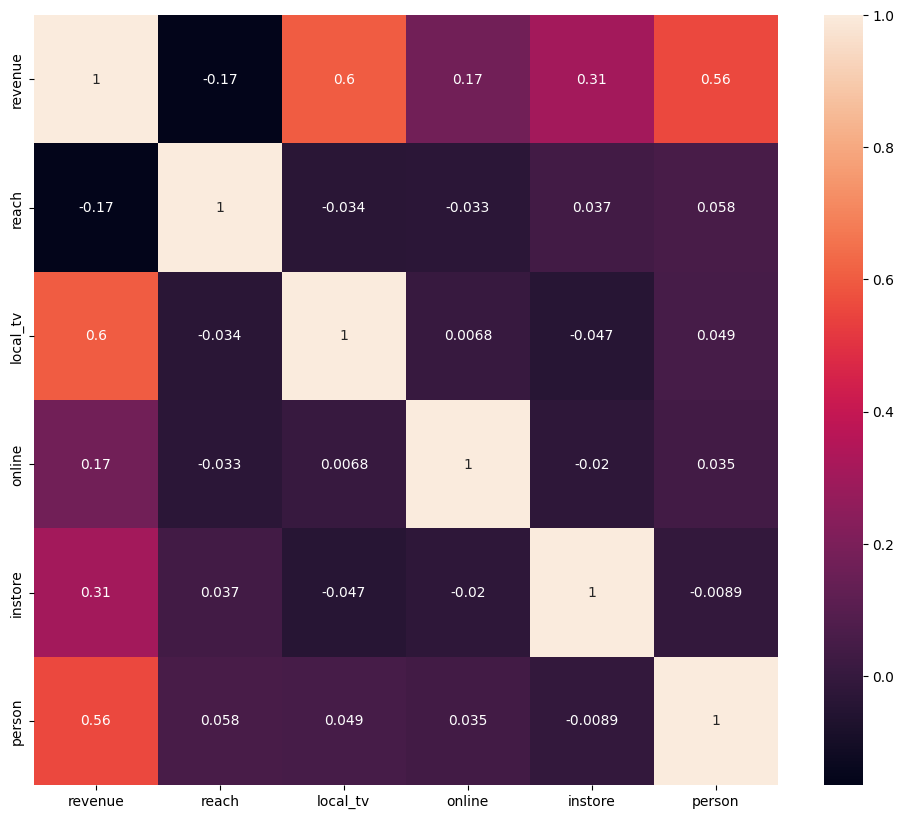

In [0]:
fig1, ax = plt.subplots(figsize = (12, 10))

sns.heatmap(store_revenue.corr(), annot = True)

plt.show()

We know that event values are not numeric, so we need to convert the event columns in to numeric column which we will do later.

In [0]:
store_revenue['event'].unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

Obtaining  revenue under these four types of event

special event earned the most revenue averagely
cobranding is the most frequent event

In [0]:
store_revenue.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,38288.119016,11979.348536,7146.99,30444.2750,37907.490,46327.7400,79342.07
holiday,96.0,37871.494896,12021.835993,5000.00,29722.5775,38299.100,46234.7875,73377.15
non_event,182.0,38029.054396,11210.926875,6874.43,29988.5650,38073.755,44634.6725,69429.39
special,275.0,39237.940545,11704.709265,10207.96,31385.3850,39553.130,46136.6350,71757.50


Event wise revenue breakdown using barplot

<AxesSubplot:xlabel='event', ylabel='revenue'>

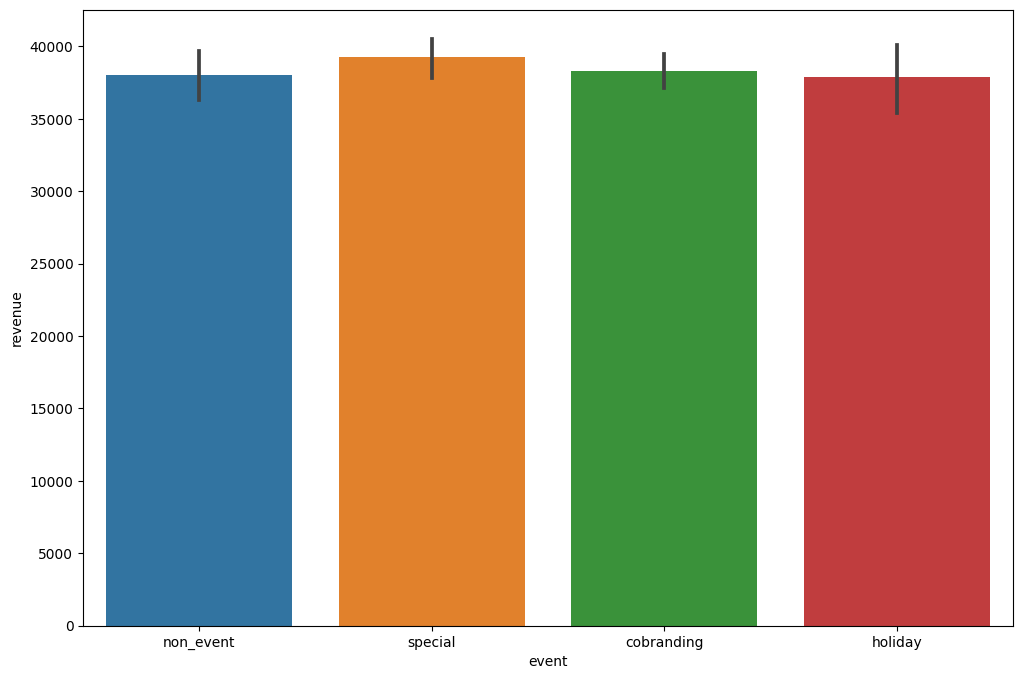

In [0]:
fig2, ax = plt.subplots(figsize = (12, 8))

sns.barplot(x = 'event', y = 'revenue', data = store_revenue)

Visualising Relationships using Scatter plot. As observed above..Positive correlation is observed between investment in local ads and Revenue

Text(0, 0.5, 'Overall_Revenue')

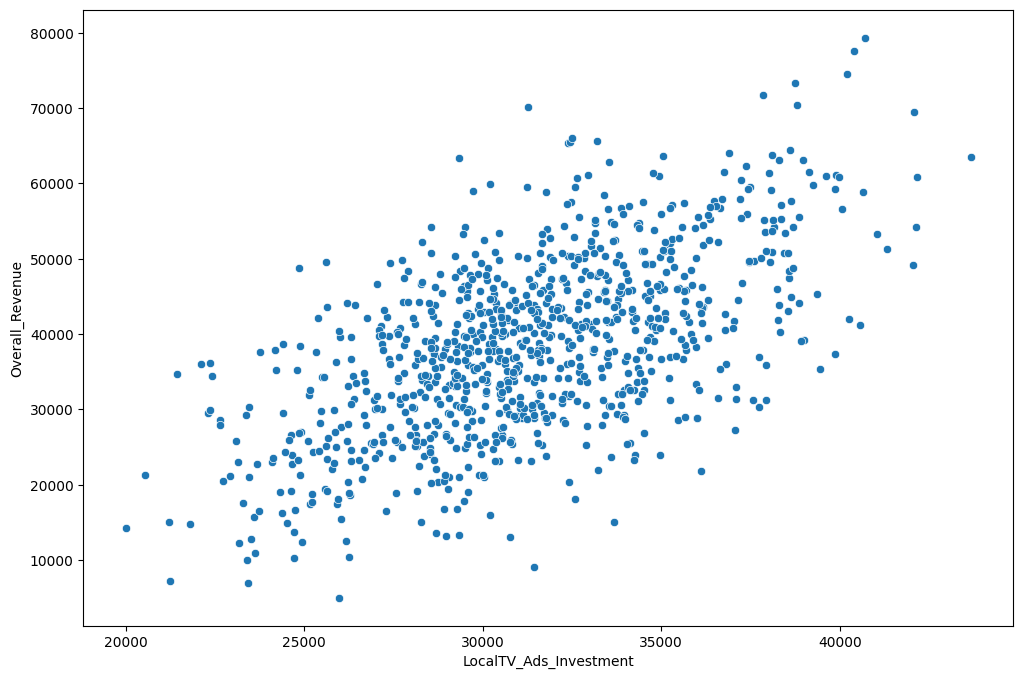

In [0]:
fig3, ax = plt.subplots(figsize = (12, 8))

sns.scatterplot(x = 'local_tv', y = 'revenue', data = store_revenue )

plt.xlabel('LocalTV_Ads_Investment')
plt.ylabel('Overall_Revenue')

Converting catergorical values in to Numerical values

In [0]:
store_revenue = pd.get_dummies(store_revenue, columns = ['event'])

store_revenue.head()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,45860.28,2,31694.91,2115,3296,8,0,0,1,0
1,63588.23,2,35040.17,1826,2501,14,0,0,0,1
2,23272.69,4,30992.82,1851,2524,6,0,0,0,1
3,45911.23,2,29417.78,2437,3049,12,0,0,0,1
4,36644.23,2,35611.11,1122,1142,13,1,0,0,0


We can introduce mlflow by setting our created workspace experiment to log all runs therafter.Experiments can also be seen by clicking on the Flask in the header menu.

In [0]:
mlflow.set_experiment(experiment_name = '/Users/amubeen457@gmail.com/srp')

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/2763935754512596', creation_time=1697369695847, experiment_id='2763935754512596', last_update_time=1697369695847, lifecycle_stage='active', name='/Users/amubeen457@gmail.com/srp', tags={'mlflow.experiment.sourceName': '/Users/amubeen457@gmail.com/srp',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'amubeen457@gmail.com',
 'mlflow.ownerId': '521721293902460'}>

In [0]:
mlflow.start_run()
mlflow.log_figure(fig1, 'corrplot_heatmap.png')
mlflow.log_figure(fig2, 'barplot_revenue_event_wise.png')
mlflow.log_figure(fig3, 'localtvads_revenue.png')
mlflow.end_run()

Splitting the data for test and train.Note that We are converting Predictors df as Float type to avoid warnings related to missing data

In [0]:
X = store_revenue.drop('revenue', axis = 1)
y = store_revenue['revenue']
X = X.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((743, 9), (186, 9), (743,), (186,))

By the below box plot we can  see that our numeric columns are in very different ranges of values before scaling

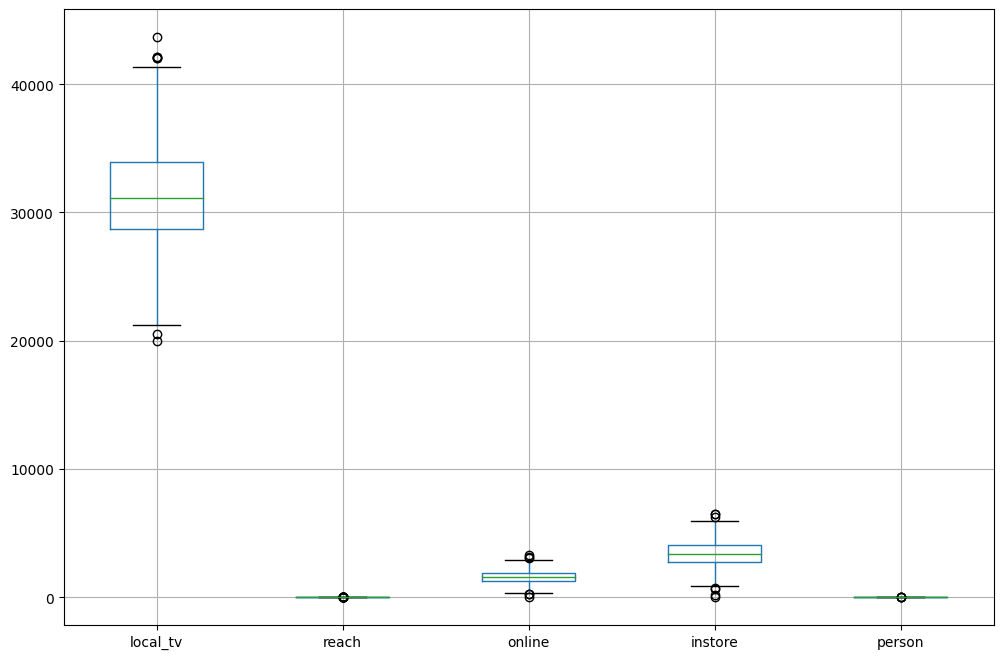

In [0]:
store_revenue.boxplot(column = ['local_tv', 'reach', 'online', 'instore', 'person'], figsize = (12, 8))

plt.show()


Separate datasets are made for numerical and categorical columns before performing Scaling

In [0]:
numerical_data = ['reach', 'local_tv', 'online', 'instore', 'person']
categorical_data = ['event_cobranding', 'event_holiday', 'event_non_event', 'event_special']

X_train_numerical = X_train[numerical_data]
X_test_numerical = X_test[numerical_data]

X_train_numerical.head()

,reach,local_tv,online,instore,person
316,5.0,29888.86,1974.0,1891.0,9.0
796,3.0,29585.68,1189.0,3304.0,13.0
63,2.0,32687.14,2732.0,2181.0,9.0
714,3.0,29982.31,1988.0,4973.0,10.0
478,4.0,29494.04,2002.0,4200.0,11.0


In [0]:
X_train_categorical = X_train[categorical_data]
X_test_categorical = X_test[categorical_data]

X_train_categorical.head()

,event_cobranding,event_holiday,event_non_event,event_special
316,0.0,0.0,1.0,0.0
796,0.0,1.0,0.0,0.0
63,0.0,0.0,1.0,0.0
714,1.0,0.0,0.0,0.0
478,1.0,0.0,0.0,0.0


Here we are scaling our  columns of separate dataframe which is  made up of  numerical columns from training set and scaling columns of  separate dataframe which is made up of numerical columns from test set(using the same mean, stddev from the training set)

In [0]:
scaler = StandardScaler()

X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), 
                                 columns = X_train_numerical.columns)

X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical),
                                columns = X_test_numerical.columns)

Combining our scaled numeric columns with our one-hot-encoded categorical columns( only the training dataset)

In [0]:
X_train_categorical.reset_index(drop = True, inplace = True)
X_train_numerical.reset_index(drop = True, inplace = True)

X_train = pd.concat([X_train_numerical, X_train_categorical], axis = 1)

X_train.head()

,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,1.552441,-0.369242,0.749687,-1.524322,-0.668705,0.0,0.0,1.0,0.0
1,-0.376428,-0.445313,-0.828391,-0.086664,0.631093,0.0,1.0,0.0,0.0
2,-1.340862,0.332869,2.273488,-1.229261,-0.668705,0.0,0.0,1.0,0.0
3,-0.376428,-0.345795,0.777831,1.611461,-0.343755,1.0,0.0,0.0,0.0
4,0.588006,-0.468306,0.805975,0.824972,-0.018806,1.0,0.0,0.0,0.0


Combining our scaled numeric columns with our one-hot-encoded categorical columns( only the testing dataset)

In [0]:
X_test_categorical.reset_index(drop = True, inplace = True)
X_test_numerical.reset_index(drop = True, inplace = True)

X_test = pd.concat([X_test_numerical, X_test_categorical], axis = 1)

X_test.head()

,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,1.552441,0.385221,1.756843,-0.136519,0.631093,0.0,0.0,1.0,0.0
1,1.552441,0.500727,-0.372055,0.487178,-0.993654,0.0,0.0,0.0,1.0
2,1.552441,-0.997883,-0.148913,-0.970829,1.280992,0.0,0.0,0.0,1.0
3,0.588006,1.107827,-0.896741,-0.685943,0.306143,0.0,0.0,0.0,1.0
4,-0.376428,-1.270696,0.675306,-0.711379,-0.668705,1.0,0.0,0.0,0.0


Post scaling, The numerical variables distributions can be seen in more or less same range

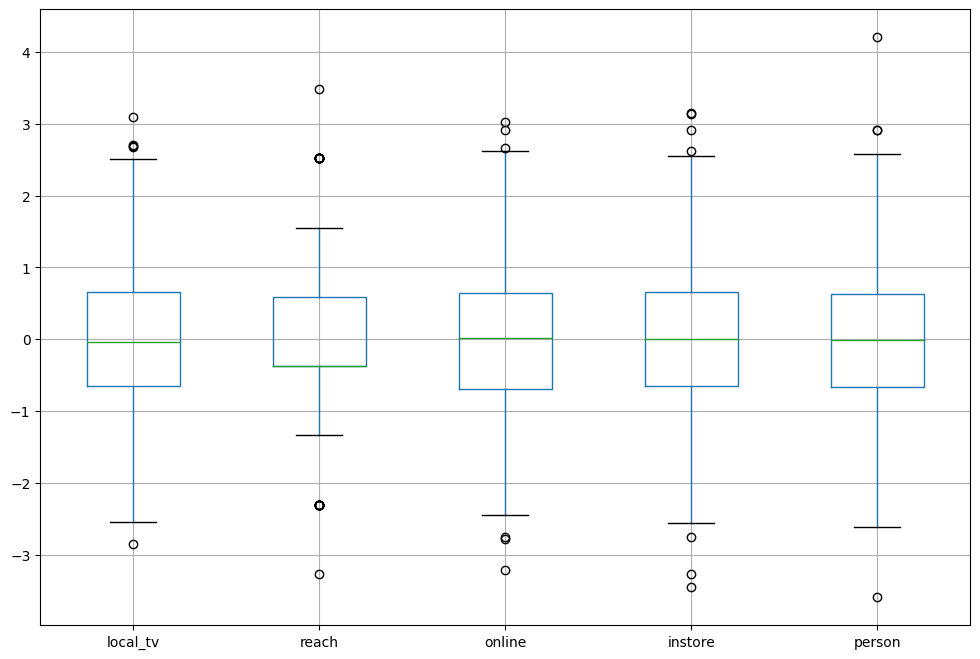

In [0]:
X_train.boxplot(column = ['local_tv', 'reach', 'online', 'instore', 'person'], figsize = (12, 8))

plt.show()

In [0]:
mlflow.sklearn.autolog()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

with mlflow.start_run(run_name = 'linear_regression_model') as run1:

      lr = LinearRegression()
      lr.fit(X_train, y_train)

      y_pred =  lr.predict(X_test)
      
      testing_score = r2_score(y_test, y_pred)
      mean_absolute_score = mean_absolute_error(y_test, y_pred)
      mean_sq_error = mean_squared_error(y_test, y_pred)
      
      run1 = mlflow.active_run()
      
      print('Active run_id: {}'.format(run1.info.run_id))

2023/10/15 11:41:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


Active run_id: 43b7b2e59ad24f728d66f37160fe3d58


Running one more run this time using Randomforest Regressor on same training data.

In [0]:
with mlflow.start_run(run_name = 'randomforest_regression_model') as run2:
      rf = RandomForestRegressor()
      rf.fit(X_train, y_train)

      y_pred =  rf.predict(X_test)
      
      testing_score = r2_score(y_test, y_pred)
      mean_absolute_score = mean_absolute_error(y_test, y_pred)
      mean_sq_error = mean_squared_error(y_test, y_pred)
      
      run2 = mlflow.active_run()
      
      print('Active run_id: {}'.format(run2.info.run_id))

Active run_id: ff7d6f7ea8574efe9deb0d24f7d41639


## TODO Recording

- Open up the run for random forest in a new tab  (click on 1 run in the results)
- Click through and show each detail in the run Parameters, Metrics
- Close the tab with the run

In [0]:
with mlflow.start_run(run_name = 'knn_regression_model') as run3:
      knn = KNeighborsRegressor()
      knn.fit(X_train, y_train)
      
      y_pred =  knn.predict(X_test)
      
      testing_score = r2_score(y_test, y_pred)
      mean_absolute_score = mean_absolute_error(y_test, y_pred)
      mean_sq_error = mean_squared_error(y_test, y_pred)
      
      run3 = mlflow.active_run()
      
      print('Active run_id: {}'.format(run3.info.run_id))

Active run_id: 936b798dbcaf4e6185824bc27b09212b


In [0]:
run1.info.run_id

'43b7b2e59ad24f728d66f37160fe3d58'

In [0]:
run_id1 = run1.info.run_id
model_uri = 'runs:/' + run_id1 + '/model'

In [0]:
import mlflow.sklearn

model = mlflow.sklearn.load_model(model_uri = model_uri)

model.coef_

array([-2280.39369148,  6787.2010622 ,  1650.2234452 ,  4192.16805257,
        6250.6670496 ,   187.68623538,   510.4137645 ,  -748.89582888,
          50.795829  ])

Obtaining predictions for test data

In [0]:
y_pred = model.predict(X_test)

y_pred

array([43083.01833941, 33612.40450612, 31915.11082095, 42273.03924711,
       24859.84795931, 48959.28136966, 37146.91779982, 30170.82331234,
       36885.24894653, 40214.65631313, 59332.21152135, 54694.40772127,
       30188.44970859, 49749.07167889,  5389.41926509, 21297.29900513,
       43663.36301187, 35210.98868979, 30814.71769084, 44682.83297275,
       25949.30591465, 28152.51094813, 48539.90152888, 23136.08819291,
       14857.3039233 , 40660.77125708, 26382.18748393, 22876.56055999,
       59083.686197  , 50107.01767985, 46014.69633312, 27413.05447335,
       28018.27105662, 29965.62276427, 47119.72675791, 21319.747057  ,
       27012.84033421, 29205.10049979, 50767.44649211, 31703.29457514,
       48108.18659272, 30308.32199107, 36767.60766195, 41995.51103132,
       39857.6300178 , 23753.39145379, 34007.39144102, 40739.11999452,
       36970.57346196, 34777.20430113, 28989.82657819, 37423.93950523,
       44939.3884114 , 18807.79685054, 40122.8041316 , 41302.59762872,
      

The loaded model should match the original

In [0]:
predictions_loaded = model.predict(X_test)
predictions_original = lr.predict(X_test)
 
assert(np.array_equal(predictions_loaded, predictions_original))

Creating  the PySpark UDF.

In [0]:
import mlflow.pyfunc

pyfunc_udf = mlflow.pyfunc.spark_udf(spark, model_uri = model_uri, env_manager = 'conda')

2023/10/15 11:58:56 INFO mlflow.pyfunc: This UDF will use conda to recreate the model's software environment for inference. This may take extra time during execution.
2023/10/15 11:58:56 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'


---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File /local_disk0/.ephemeral_nfs/envs/pythonEnv-ad4291a2-86c9-4751-a027-541a14f3faa8/lib/python3.10/site-packages/mlflow/utils/conda.py:224, in get_or_create_conda_env(conda_env_path, env_id, capture_output, env_root_dir)
    222 try:
    223     # Checks if Conda executable exists
--> 224     process._exec_cmd([conda_path, "--help"], throw_on_error=False)
    225 except OSError:

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-ad4291a2-86c9-4751-a027-541a14f3faa8/lib/python3.10/site-packages/mlflow/utils/process.py:95, in _exec_cmd(cmd, throw_on_error, extra_env, capture_output, synchronous, stream_output, **kwargs)
     93         kwargs["stderr"] = subprocess.STDOUT
---> 95 process = subprocess.Popen(
     96     cmd,
     97     env=env,
     98     text=True,
     99     **kwargs,
    100 )
    101 if not synchronous:

File /usr/li

Spark dataframe is created for Test data

In [0]:
X_test_sp = spark.createDataFrame(X_test)

Predictions are obtained and are same as predictions made earlier

In [0]:
from pyspark.sql.functions import struct
 
predicted_df = X_test_sp.withColumn('prediction', pyfunc_udf(struct(*(X_test.columns.tolist()))))
display(predicted_df)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2763935754512592>, line 3
      1 from pyspark.sql.functions import struct
----> 3 predicted_df = X_test_sp.withColumn('prediction', pyfunc_udf(struct(*(X_test.columns.tolist()))))
      4 display(predicted_df)

NameError: name 'pyfunc_udf' is not defined